### Feature Engineering, Selection and Extraction

##### What is a Feature?

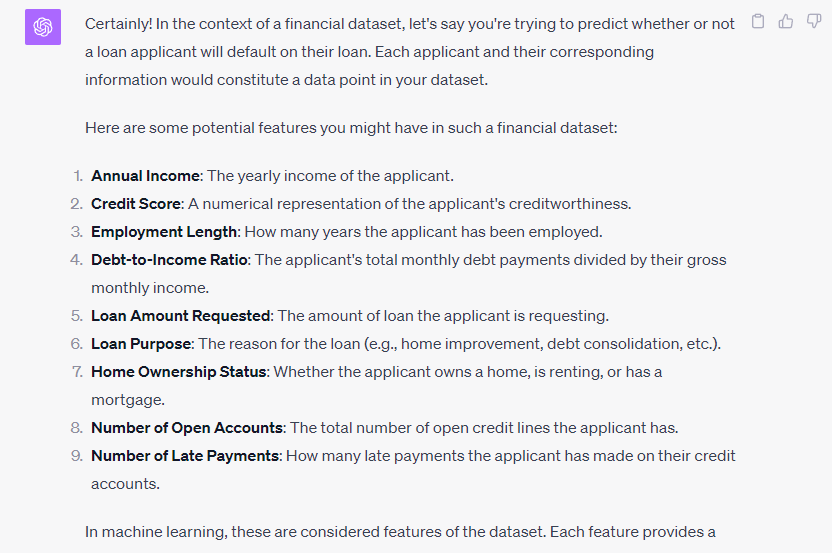

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Seed for reproducibility
np.random.seed(0)

# Create a DataFrame with 10 rows of sample data for loan applicants
data = {
    'Annual_Income': [50000, 75000, np.nan, 120000, 90000, 60000, np.nan, 65000, 70000, 110000],
    'Credit_Score': [700, np.nan, 800, 650, 720, 690, 710, np.nan, 760, 790],
    'Employment_Length': [5, 10, 2, 8, 4, np.nan, 1, 7, 9, 3],
    'Debt_to_Income_Ratio': [0.2, 0.3, 0.1, np.nan, 0.15, 0.25, 0.35, 0.22, np.nan, 0.28],
    'Loan_Amount_Requested': [20000, 30000, 10000, np.nan, 15000, 25000, 7000, 12000, 18000, 22000],
    'Loan_Purpose': ['Home', 'Debt Consolidation', 'Education', 'Business', 'Travel', np.nan, 'Other', 'Home', 'Business', 'Education'],
    'Home_Ownership_Status': ['Own', 'Mortgage', 'Rent', 'Own', 'Rent', 'Mortgage', np.nan, 'Own', 'Mortgage', 'Rent'],
    'Number_of_Open_Accounts': [4, 3, 6, 5, np.nan, 7, 4, 3, 5, 6],
    'Number_of_Late_Payments': [0, 1, 0, 2, 1, 0, np.nan, 0, 0, 1]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


,Annual_Income,Credit_Score,Employment_Length,Debt_to_Income_Ratio,Loan_Amount_Requested,Loan_Purpose,Home_Ownership_Status,Number_of_Open_Accounts,Number_of_Late_Payments
0,50000,700,5,0.20,20000,Home,Own,4,0
1,75000,750,10,0.30,30000,Debt Consolidation,Mortgage,3,1
2,100000,800,2,0.10,10000,Education,Rent,6,0
3,120000,650,8,0.40,50000,Business,Own,5,2
4,90000,720,4,0.15,15000,Travel,Rent,2,1
5,60000,690,6,0.25,25000,Medical,Mortgage,7,0
6,55000,710,1,0.35,7000,Other,Rent,4,1
7,65000,730,7,0.22,12000,Home,Own,3,0
8,70000,760,9,0.18,18000,Business,Mortgage,5,0
9,110000,790,3,0.28,22000,Education,Rent,6,1


### Feature Engineering Types

### Handling Missing Values
#### 1. Remove Rows with Missing Values

In [6]:
# Sample Data with Missing Values
df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [5, None, 7, 8]})

# Drop rows containing missing values
df.dropna(inplace=True)
df

,A,B
0,1.0,5.0
3,4.0,8.0


#### 2. Imputation

In [11]:
from sklearn.impute import SimpleImputer
df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [5, None, 7, 8]})

imputer = SimpleImputer(strategy='mean')
df['A'] = imputer.fit_transform(df[['A']])
df

,A,B
0,1.000000,5.0
1,2.000000,NaN
2,2.333333,7.0
3,4.000000,8.0


In [15]:
del(df)

### Categorical Encoding
#### 1. Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame({'Category': ['Red', 'Green', 'Blue', 'Green']})

df['Category'] = ['Red', 'Green', 'Blue', 'Green']
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df

,Category
0,2
1,1
2,0
3,1


#### 2. One-Hot Encoding

In [18]:
df = pd.get_dummies(df, columns=['Category'], prefix='Color')
df

,Color_0,Color_1,Color_2
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0


#### Min-Max Scaling
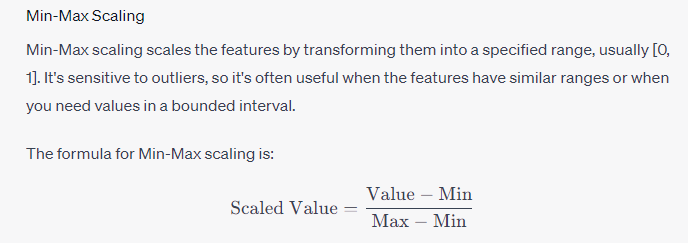

In [20]:
# Creating a sample dataframe
df = pd.DataFrame({
    'Salary': [25000, 55000, 40000, 76000, 98000],
    'Age': [22, 38, 29, 45, 55]
})
df

,Salary,Age
0,25000,22
1,55000,38
2,40000,29
3,76000,45
4,98000,55


In [21]:

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=['Salary', 'Age'])

# The new data is scaled between 0 and 1
df_scaled

,Salary,Age
0,0.000000,0.000000
1,0.410959,0.484848
2,0.205479,0.212121
3,0.698630,0.696970
4,1.000000,1.000000


#### Standard Scaling
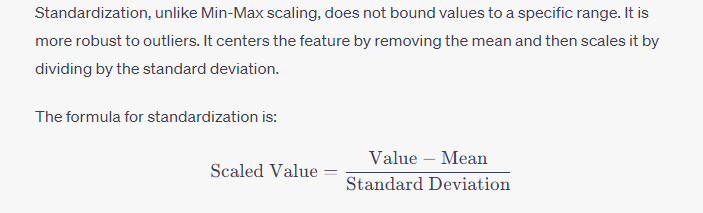

In [23]:
df

,Salary,Age
0,25000,22
1,55000,38
2,40000,29
3,76000,45
4,98000,55


In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Transform the data
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=['Salary', 'Age'])

# The new data will have mean 0 and standard deviation 1
print(df_standardized)

     Salary       Age
0 -1.307213 -1.360049
1 -0.146965  0.017216
2 -0.727089 -0.757496
3  0.665209  0.619769
4  1.516058  1.480560


### Feature Selection


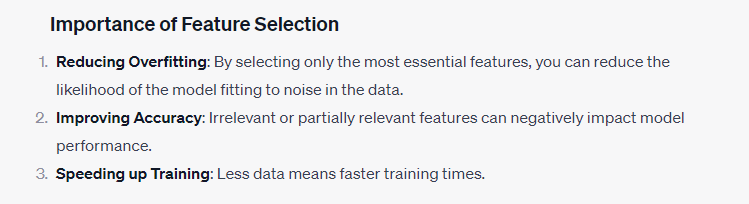

Calculate the score of the Features to know how far each variable is close to its Target variable

In [25]:
import pandas as pd

# Sample dataset
data = {
    'Age': [25, 45, 35, 50, 23],
    'Education': ['High School', 'Masters', 'Bachelors', 'Doctorate', 'High School'],
    'Hours-Per-Week': [40, 50, 40, 60, 20],
    'Occupation': ['Clerk', 'Manager', 'Developer', 'Researcher', 'Cashier'],
    'Country': ['USA', 'Canada', 'USA', 'UK', 'USA'],
    'Income': ['<=50K', '>50K', '>50K', '>50K', '<=50K']
}

df = pd.DataFrame(data)
df

,Age,Education,Hours-Per-Week,Occupation,Country,Income
0,25,High School,40,Clerk,USA,<=50K
1,45,Masters,50,Manager,Canada,>50K
2,35,Bachelors,40,Developer,USA,>50K
3,50,Doctorate,60,Researcher,UK,>50K
4,23,High School,20,Cashier,USA,<=50K


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Sample dataset
data = {
    'Age': [25, 45, 35, 50, 23],
    'Education': ['High School', 'Masters', 'Bachelors', 'Doctorate', 'High School'],
    'Hours-Per-Week': [40, 50, 40, 60, 20],
    'Occupation': ['Clerk', 'Manager', 'Developer', 'Researcher', 'Cashier'],
    'Country': ['USA', 'Canada', 'USA', 'UK', 'USA'],
    'Income': ['<=50K', '>50K', '>50K', '>50K', '<=50K']
}

df = pd.DataFrame(data)

# Label encode categorical variables
label_encoders = {}
for column in ['Education', 'Occupation', 'Country', 'Income']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target variable
X = df.drop('Income', axis=1)
y = df['Income']

# Initialize Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model
clf.fit(X, y)

# Make predictions (here we're using the same data for simplicity)
y_pred = clf.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Features': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(features_df)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Feature Importances:
         Features  Importance
0             Age    0.320062
3      Occupation    0.264506
2  Hours-Per-Week    0.189815
1       Education    0.118056
4         Country    0.107562
Model Accuracy: 100.00%


#### Remove the least important Features and calculate the Accuracy again

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Sample dataset
data = {
    'Age': [25, 45, 35, 50, 23],
    'Education': ['High School', 'Masters', 'Bachelors', 'Doctorate', 'High School'],
    'Hours-Per-Week': [40, 50, 40, 60, 20],
    'Occupation': ['Clerk', 'Manager', 'Developer', 'Researcher', 'Cashier'],
    'Country': ['USA', 'Canada', 'USA', 'UK', 'USA'],
    'Income': ['<=50K', '>50K', '>50K', '>50K', '<=50K']
}

df = pd.DataFrame(data)

# Label encode categorical variables
label_encoders = {}
for column in ['Education', 'Occupation', 'Country', 'Income']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Drop the least important feature 'Country'
df = df.drop('Country', axis=1)

# Features and target variable
X = df.drop('Income', axis=1)
y = df['Income']

# Initialize Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model
clf.fit(X, y)

# Make predictions (here we're using the same data for simplicity)
y_pred = clf.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Features': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

print("Feature Importances after removing least important feature:")
print(features_df)

print(f"Model Accuracy after removing least important feature: {accuracy * 100:.2f}%")


Feature Importances after removing least important feature:
         Features  Importance
0             Age    0.378947
3      Occupation    0.322368
2  Hours-Per-Week    0.178947
1       Education    0.119737
Model Accuracy after removing least important feature: 100.00%


Thus, it proven not all features are important and required to build a fair model. By reducing the features that has no no or less relevance to the Accuracy, computing resources can be saved and it would be helpful for Interpretability and to know which has signifance in the real world

### Feature Selection Techniques

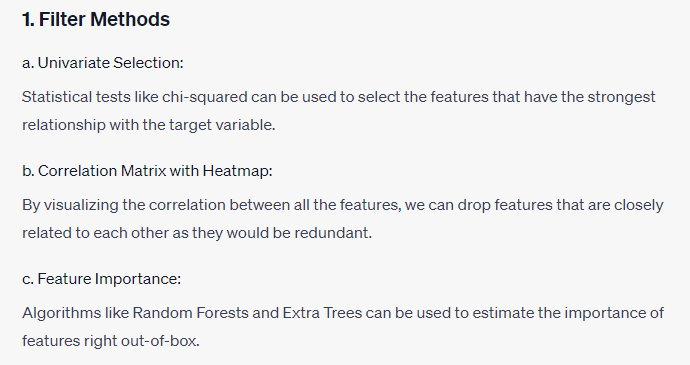

### Univariate Selection - 


Chi-Square would give the score of feature that denotes how close teh feature to target variable. In the function SelectKBest, if any value mentioned for k, then the function would limit the dataset to the mentioned 'k' number of features and gives the score

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(np.c_[X, y], columns= iris.feature_names + ['target'])

# Apply SelectKBest and fit the features to the target
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

# Create a DataFrame for the scores
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(df.columns[:-1])  # Excluding the target column

# Concatenate the two DataFrames for better visualization
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Print the scores for each feature
print("Feature Scores:")
print(feature_scores)

# Select the top 2 features based on the chi-squared score
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Feature Scores:
             Feature       Score
0  sepal length (cm)   10.817821
1   sepal width (cm)    3.710728
2  petal length (cm)  116.312613
3   petal width (cm)   67.048360
Model Accuracy: 100.00%


### Correlation Matrix with Heatmap

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


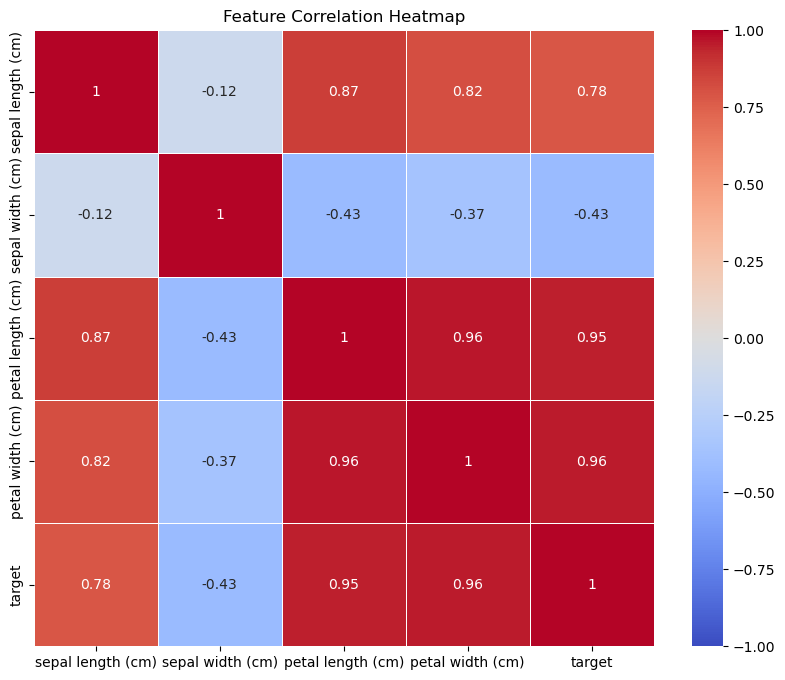

In [30]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load Dataset
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(np.c_[X, y], columns= iris.feature_names + ['target'])

# Compute Correlation Matrix
# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix for review
print(correlation_matrix)

# Visualize the HEatmap
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix,
            annot=True,      # Annotate each cell with the numeric value
            cmap='coolwarm', # Color scheme
            vmin=-1, vmax=1, # Color range
            linewidths=.5)   # Edge linewidths
plt.title("Feature Correlation Heatmap")
plt.show()



In this heatmap:

The color close to 1 or -1 indicates high correlation.
A correlation close to 1 implies a strong positive correlation: as one feature increases, the second feature tends to also increase.
A correlation close to -1 implies a strong negative correlation: as one feature increases, the second feature tends to decrease.
A correlation close to 0 implies no correlation: changes in one feature do not predict changes in the second feature.
You can use this information to eliminate features that are highly correlated with each other, as they would carry similar information, or to select the features that are most highly correlated with the target variable.

For example, if two features are highly positively or negatively correlated, keeping both features in the model might be redundant. In such cases, you might consider dropping one of them. Likewise, features with very low correlation with the target variable might not be very informative and could be candidates for removal.

#### Feature Importance through Random Forest

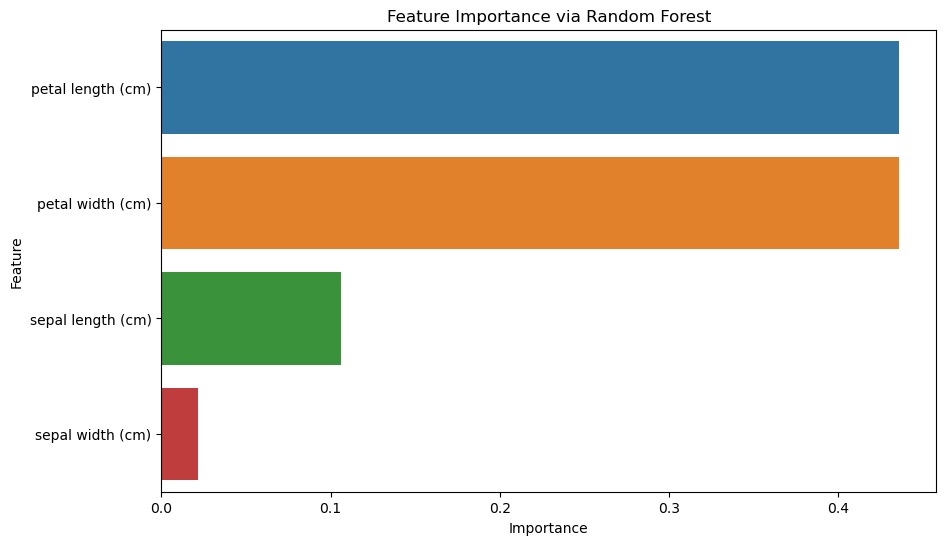

Model Accuracy with Top Features: 100.00%


In [32]:
# Import the Libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame to make data manipulation easier
df = pd.DataFrame(X, columns=iris.feature_names)

#Fit Random Forest Model
# Initialize and fit the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Extract and Visualize Feature Importance
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for easier manipulation
feature_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance via Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model performance with Top features
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select only top 2 most important features
top_features = feature_df['Feature'][:2].tolist()
X_top = df[top_features].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train and predict
clf_top_features = RandomForestClassifier(n_estimators=100, random_state=42)
clf_top_features.fit(X_train, y_train)
y_pred = clf_top_features.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Top Features: {accuracy * 100:.2f}%")



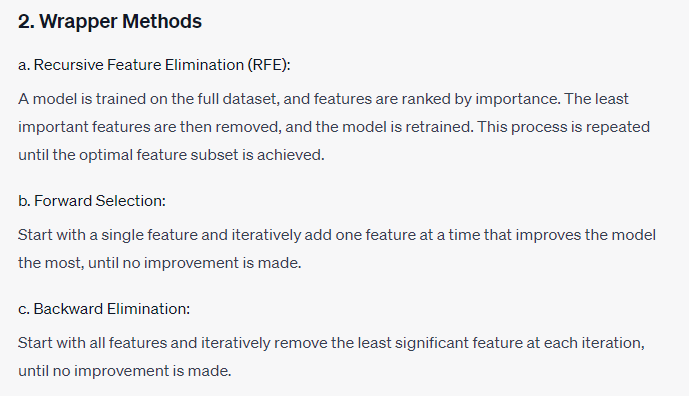

#### Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection method that fits a model and removes the weakest features (either based on coefficients or feature importances) until the specified number of features is reached. It's called "recursive" because it fits the model multiple times with varying numbers of features.

In [33]:
# Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import pandas as pd

# Load Data and Prepare Dataset
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Recursive Feature Elimination
# Create the RFE object and rank each feature
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
fit = rfe.fit(X_train, y_train)

# The "ranking_" attribute returns an array that represents the ranking of features
# Lower the rank, more important the feature
print("Feature Ranking:", fit.ranking_)

# Evaluate the Model
# Transform data to only those features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train and test the model
svc.fit(X_train_rfe, y_train)
y_pred = svc.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy with Selected Features: {accuracy * 100:.2f}%")



Feature Ranking: [3 2 1 1]
Model Accuracy with Selected Features: 100.00%


In the last example using the Iris dataset, the initial features are:

Sepal length
Sepal width
Petal length
Petal width
These are the four features in the original Iris dataset, which are used to classify iris flowers into one of three species: Setosa, Versicolor, or Virginica.

When using Recursive Feature Elimination (RFE) with the n_features_to_select=2, the algorithm aims to select the top 2 most important features while discarding the other two. The fit.ranking_ attribute provides a ranking of features where features with a ranking of '1' are the most important.

However, I did not explicitly mention which features got removed in the last example. Typically, in the fit.ranking_ output, the features with rankings higher than 1 are the ones that are removed. The exact features that get removed depend on the specific algorithm and data; you would find out by running the code and examining the fit.ranking_ attribute.

For instance, if the output of fit.ranking_ is [1, 2, 1, 3], this means:

Feature 1 (Sepal length) and Feature 3 (Petal length) are the most important (ranking = 1).
Feature 2 (Sepal width) and Feature 4 (Petal width) are less important and therefore removed (ranking > 1).
You can identify which features got removed by mapping the rankings back to the original feature names.

#### Forward Selection

Forward selection is a type of feature selection method where you start with an empty set of features and keep adding one feature at a time until no further improvement is observed in the model performance. Typically, this involves running a model many times with different combinations of features, making it computationally expensive but effective.

Here's a simplified example using Python's scikit-learn library and the Iris dataset, along with logistic regression as the classification algorithm.

In [36]:
# Import Libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load Dataset
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward Selection Function
def forward_selection(X_train, y_train, X_test, y_test, feature_names):
    remaining_features = list(range(X_train.shape[1]))
    selected_features = []
    best_acc = 0.0

    while len(remaining_features) > 0:
        temp_acc = 0.0
        temp_feature = None
        for feature in remaining_features:
            test_features = selected_features + [feature]
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train[:, test_features], y_train)
            y_pred = model.predict(X_test[:, test_features])
            accuracy = accuracy_score(y_test, y_pred)
            
            if accuracy > temp_acc:
                temp_acc = accuracy
                temp_feature = feature

        if temp_acc > best_acc:
            best_acc = temp_acc
            selected_features.append(temp_feature)
            remaining_features.remove(temp_feature)
            print(f"Added feature {feature_names[temp_feature]}, Accuracy: {best_acc:.4f}")
        else:
            print("No improvement. Stopping.")
            break
    
    return selected_features

# Feature names in the Iris dataset
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

# Run forward selection and print selected features
selected_features = forward_selection(X_train, y_train, X_test, y_test, feature_names)

# Print the final list of selected features
print("Final list of selected features:")
for idx in selected_features:
    print(f"{feature_names[idx]}")


Added feature Petal length, Accuracy: 1.0000
No improvement. Stopping.
Final list of selected features:
Petal length


Initialize an empty list (selected_features) to hold the features to be included in the model.
Loop until no more features are left to consider:
For each remaining feature, add it to the selected_features list temporarily and measure the accuracy of the model.
If adding this feature improves the model's accuracy, keep it and add it permanently to selected_features.
If no more improvements can be made, stop the loop.
Return the selected features that give the best model performance.
In the end, the selected_features list will contain the features that were chosen through forward selection.

Note: In practice, you might use more sophisticated metrics (like F1-score, AUC-ROC, etc.) and methods (like cross-validation) to evaluate the model and decide which features to add. This example aims to keep it simple and easy to follow.

#### Backward Elimination

In Backward Elimination, you start with all the available features and remove the least significant feature at each iteration until no more features can be removed without affecting the performance of the model. This is the reverse of Forward Selection.

In [38]:
# Import Libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load Dataset
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Backward Elimination Function
def backward_elimination(X_train, y_train, X_test, y_test, feature_names):
    remaining_features = list(range(X_train.shape[1]))
    best_acc = 0.0

    # Initially, consider all features
    current_features = list(range(X_train.shape[1]))

    while len(current_features) > 0:
        temp_acc = 0.0
        worst_feature = None

        for feature in current_features:
            test_features = list(set(current_features) - {feature})
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train[:, test_features], y_train)
            y_pred = model.predict(X_test[:, test_features])
            accuracy = accuracy_score(y_test, y_pred)
            
            if accuracy > temp_acc:
                temp_acc = accuracy
                worst_feature = feature

        if temp_acc > best_acc:
            best_acc = temp_acc
            current_features.remove(worst_feature)
            print(f"Removed feature {feature_names[worst_feature]}, Accuracy: {best_acc:.4f}")
        else:
            print("No improvement. Stopping.")
            break
    
    return current_features

# Feature names in the Iris dataset
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

# Run backward elimination and print selected features
selected_features = backward_elimination(X_train, y_train, X_test, y_test, feature_names)

# Print the final list of selected features
print("Final list of selected features:")
for idx in selected_features:
    print(f"{feature_names[idx]}")

    

Removed feature Sepal length, Accuracy: 1.0000
No improvement. Stopping.
Final list of selected features:
Sepal width
Petal length
Petal width


Initialize a list (current_features) to hold the features currently included in the model, initially containing all features.
Loop until no more features can be removed:
For each remaining feature, remove it temporarily from current_features and measure the accuracy of the model without it.
If removing this feature improves the model's accuracy, remove it permanently from current_features.
If no improvement is observed, stop the loop.
Return the selected features that give the best model performance.

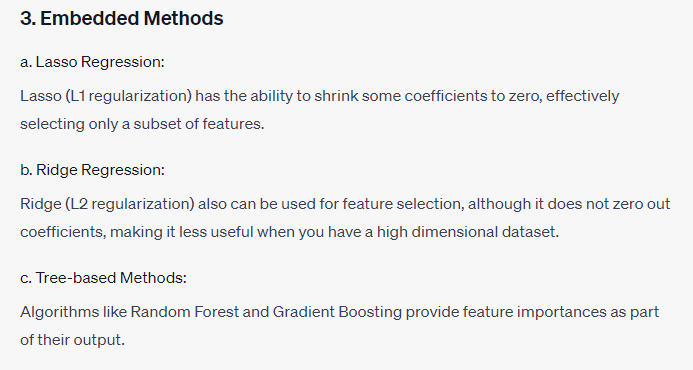

#### Lasso Regression/ L1 Regularization

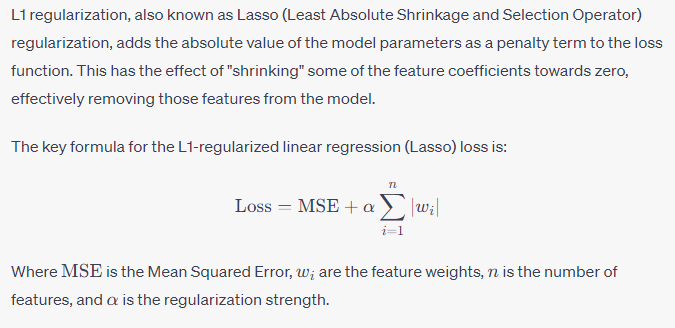

In [39]:
# Import Libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load Dataset and preprocess
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
# Initialize and train the logistic regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Inspect Feature coefficients
# Print out the feature coefficients
print(f"Feature Coefficients: {model.coef_}")


Model Accuracy: 1.0000
Feature Coefficients: [[ 0.          2.36649514 -2.67617522  0.        ]
 [ 0.69412733 -1.78894716  0.24438121 -0.88927344]
 [-2.20196994 -2.8335138   3.20314875  3.72191351]]


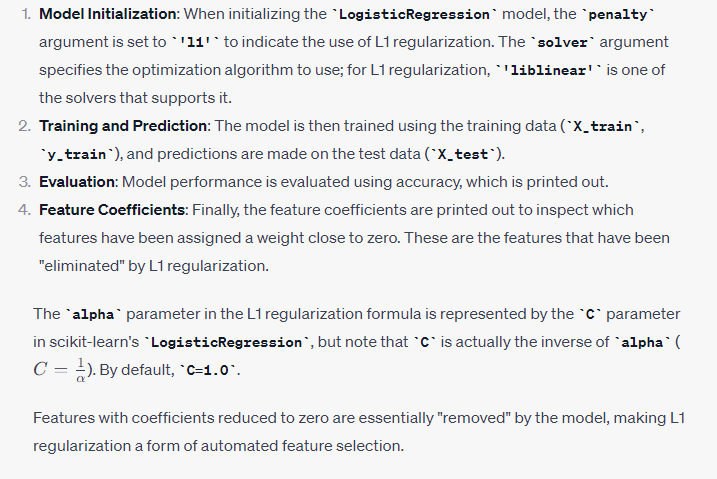

#### Ridge Regression/ L2 Regularization

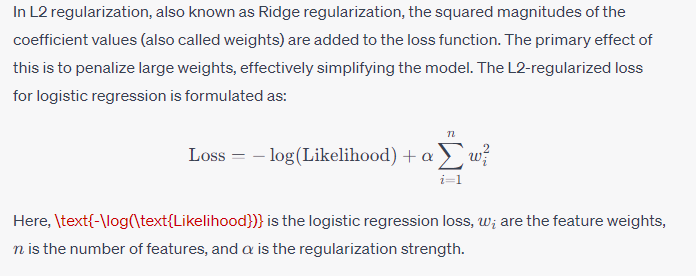

In [40]:
# Import Libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Dataset and Preprocess
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model with L2 Regularization
# Initialize and train the logistic regression model with L2 regularization
# L2 is the default penalty in scikit-learn's LogisticRegression
model = LogisticRegression(penalty='l2', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Inspect Feature coefficients
# Print out the feature coefficients
print(f"Feature Coefficients: {model.coef_}")



Model Accuracy: 1.0000
Feature Coefficients: [[-0.3969917   0.96041003 -2.37401669 -1.00307592]
 [ 0.51273386 -0.25339633 -0.21526687 -0.76916219]
 [-0.11574216 -0.7070137   2.58928356  1.77223811]]


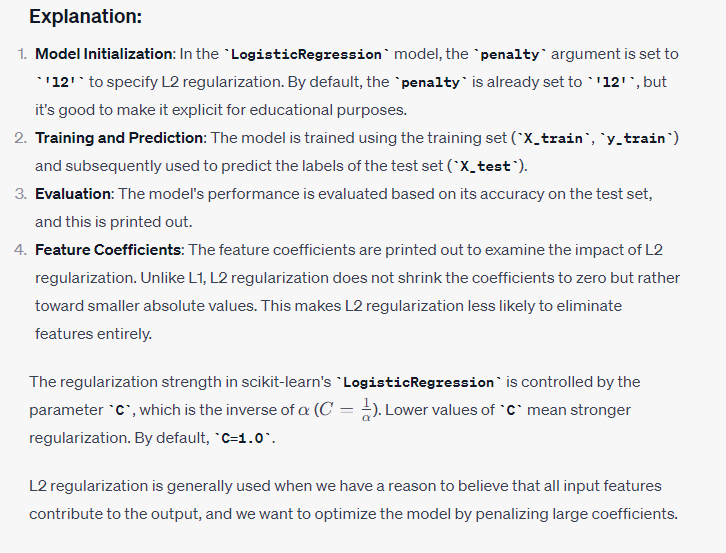

### Feature Extraction

Feature extraction is the process of transforming high-dimensional data into a lower-dimensional form, retaining the most important information in the data. Unlike feature selection, which picks a subset of the original features, feature extraction creates new features based on combinations of the original features.

Why is Feature Extraction Important?
Dimensionality Reduction: Reducing the number of features can make the computational complexity of model training more manageable.
Overfitting: Lower-dimensional space helps in reducing the risk of overfitting.
Interpretability: Extracted features can sometimes be easier to understand and interpret.
Visualization: Lower-dimensional data is easier to visualize.

#### Principal Component Analysis (PCA)
PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of linearly uncorrelated variables called principal components.

   Principal Component 1  Principal Component 2  Target
0               9.192837               1.948583       0
1               2.387802              -3.768172       0
2               5.733896              -1.075174       0
3               7.122953              10.275589       0
4               3.935302              -1.948072       0


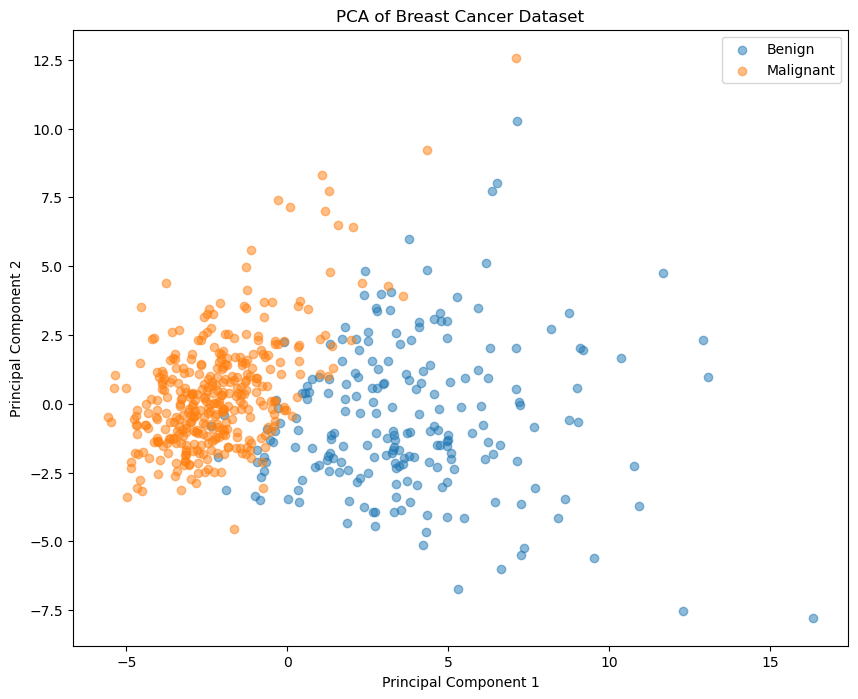

In [41]:
# Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load Dataset and Preprocess
# Load breast cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
# Initialize PCA and reduce dimensions
pca = PCA(n_components=2)  # Here, we choose to reduce to 2 dimensions for easy visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df['Target'] = y

print(df.head())

# Plot the PCA Transformed Data 

# Plot the two principal components, colored by the target (malignant/benign)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], alpha=0.5, label='Benign')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], alpha=0.5, label='Malignant')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Breast Cancer Dataset')
plt.show()


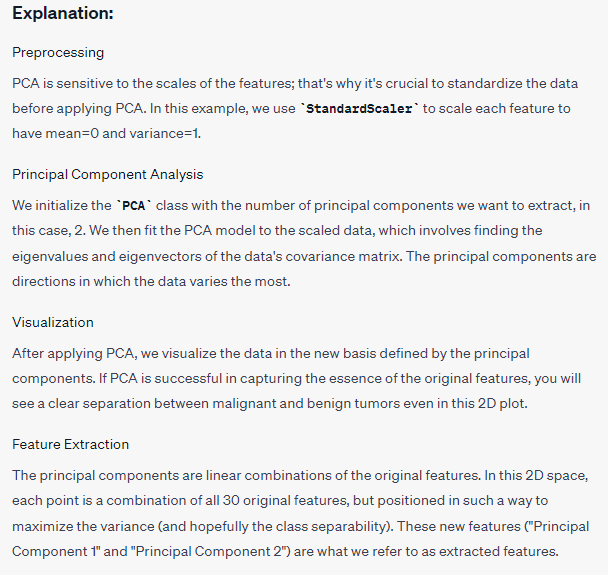

In [42]:
print(f"Explained Variance Ratios: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {np.sum(pca.explained_variance_ratio_)}")


Explained Variance Ratios: [0.44272026 0.18971182]
Total Explained Variance: 0.6324320765155949


You can look at the explained_variance_ratio_ attribute of the fitted PCA object to understand how much variance each principal component explains. 
The above code will show you the fraction of total variance captured by each principal component. The sum of these will indicate how much information we've retained by projecting the data onto these principal components

#### Linear Discriminant Analysis (LDA)
LDA is used to find a combination of features that best separates different classes. The idea is to reduce dimensions while preserving as much of the class discriminatory information as possible.

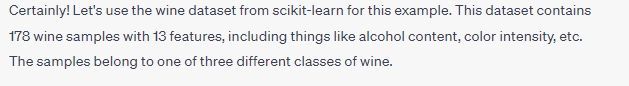

       LDA1      LDA2  Target
0  4.700244  1.979138       0
1  4.301958  1.170413       0
2  3.420720  1.429101       0
3  4.205754  4.002871       0
4  1.509982  0.451224       0


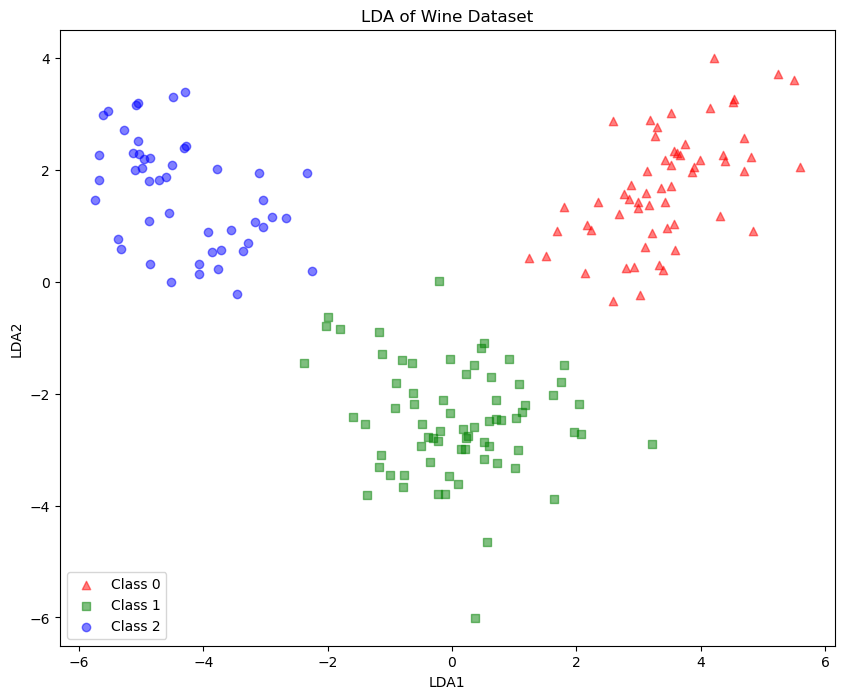

In [43]:
# Import Libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import pandas as pd

# Load Dataset and Preprocessing
# Load wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Standardize the data (important for LDA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply LDA
# Initialize LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create a DataFrame for the reduced data
df = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
df['Target'] = y

print(df.head())

# Plot the LDA transformed Data
# Plot the two LDA components, colored by the target (class of wine)
plt.figure(figsize=(10, 8))
for label, marker, color in zip(range(3), ('^', 's', 'o'), ('red', 'green', 'blue')):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=f'Class {label}', marker=marker, color=color, alpha=0.5)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.title('LDA of Wine Dataset')
plt.show()


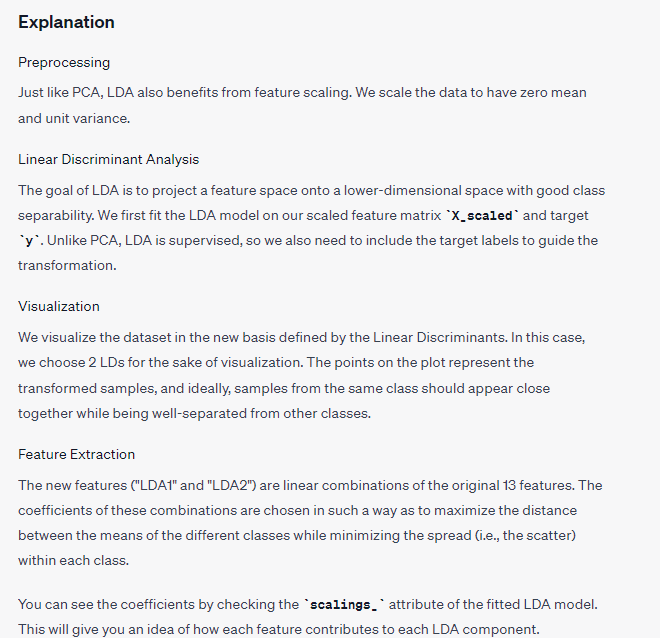

In [44]:
print(f"LDA Coefficients: {lda.scalings_}")


LDA Coefficients: [[ 0.32656943  0.7057539 ]
 [-0.18409422  0.34019413]
 [ 0.10096876  0.6417595 ]
 [-0.51550325 -0.4874728 ]
 [ 0.03081318 -0.00659072]
 [-0.38572046 -0.02010372]
 [ 1.65462779 -0.49005415]
 [ 0.18563594 -0.20240668]
 [-0.07653321 -0.17526988]
 [-0.82080524  0.58540975]
 [ 0.18645382 -0.34545646]
 [ 0.81954424  0.0362379 ]
 [ 0.84509709  0.89589896]]


LDA aims to maximize the class separability criteria, making it generally more effective than PCA for classification tasks where labels are available.

#### t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE is mainly used for the visualization of high-dimensional data. It's particularly useful when you have no idea what the underlying structure of the data should be.

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning algorithm for visualization of high-dimensional data. It's excellent for inspecting complex data sets. While PCA and LDA are linear techniques, t-SNE is capable of capturing much more complicated structures.

Let's use the handwritten digits dataset for this example. This dataset consists of 8x8 pixel images of digits (0 through 9) and includes 1,797 samples with 64 features.

      t-SNE1     t-SNE2  Target
0  38.978703 -31.390959       0
1  15.286879  -2.993164       1
2  -6.009504 -14.839417       2
3 -28.350510   2.584280       3
4  36.367405   2.485669       4


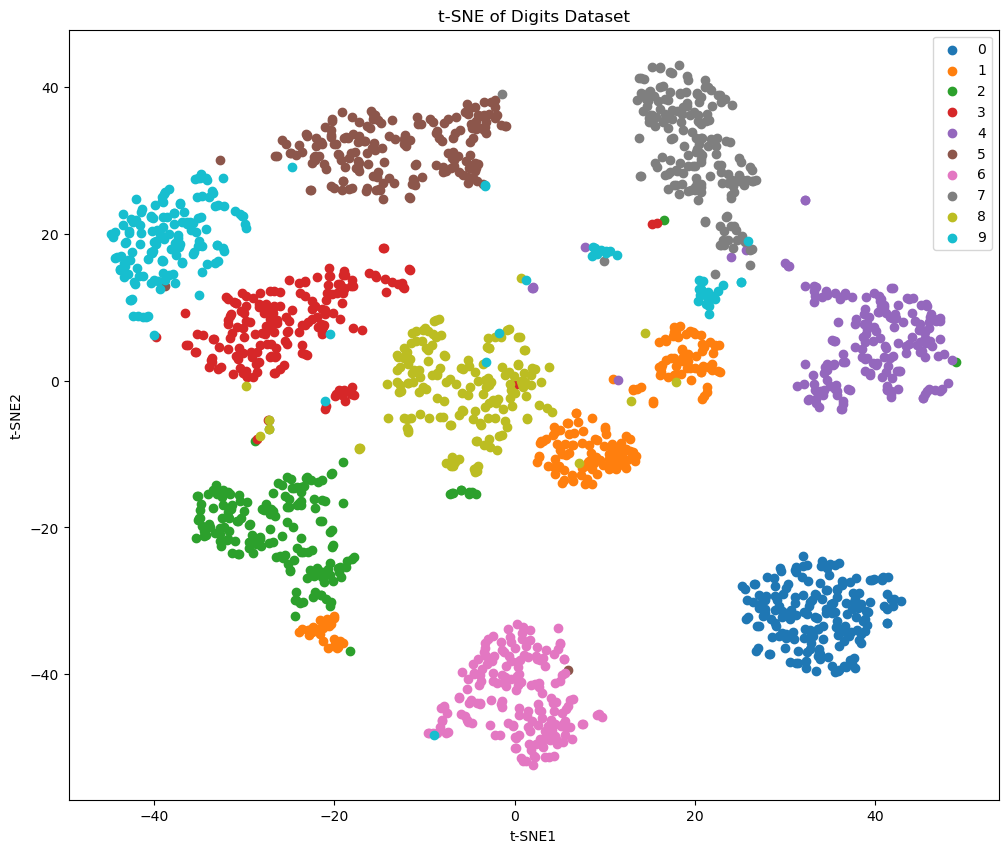

In [45]:
# Import Libraries
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

#Load Dataset and Preprocess
# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply t-SNE
# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
df = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
df['Target'] = y

print(df.head())

#Plot t-SNE results
# Create the t-SNE plot
plt.figure(figsize=(12, 10))
for i in range(10):  # 10 classes for 10 digits
    subset = df[df['Target'] == i]
    plt.scatter(subset['t-SNE1'], subset['t-SNE2'], label=str(i))

plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.title('t-SNE of Digits Dataset')
plt.show()



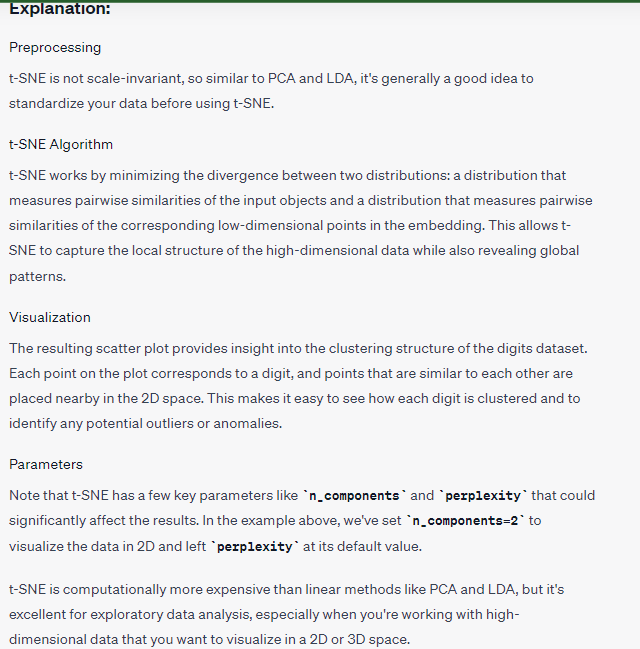

### Auto Feature engineering

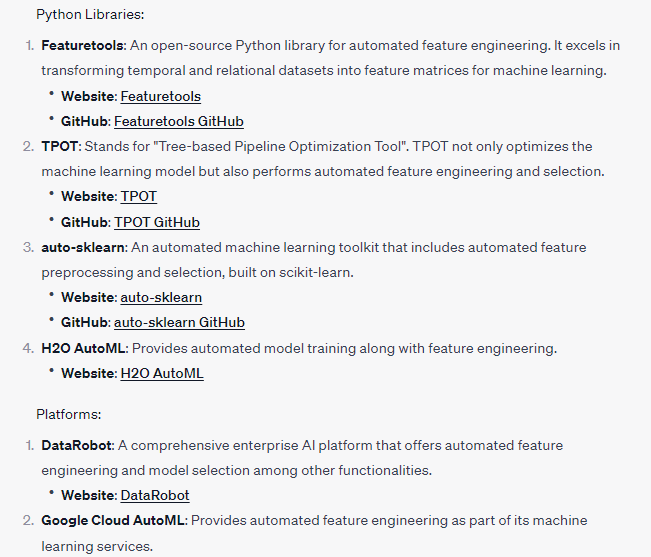

### Code Example for Auto Feature Engineering with Featuretools

In [47]:
!pip install featuretools

In [53]:
import featuretools as ft
import pandas as pd

# Create sample data
customers_df = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'signup_date': pd.to_datetime(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01']),
    'age': [25, 45, 35, 50]
})

transactions_df = pd.DataFrame({
    'transaction_id': [1, 2, 3, 4, 5, 6],
    'customer_id': [1, 1, 2, 2, 3, 4],
    'purchase_date': pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06']),
    'amount': [100, 150, 200, 220, 50, 75]
})

# Create a new EntitySet to hold our DataFrames
es = ft.EntitySet(id="customer_data")

# Add DataFrames to the EntitySet
es.add_dataframe(
    dataframe_name="customers",
    dataframe=customers_df,
    index="customer_id",
    time_index="signup_date"
)

es.add_dataframe(
    dataframe_name="transactions",
    dataframe=transactions_df,
    index="transaction_id",
    time_index="purchase_date"
)

# Define the relationship
relationship = ft.Relationship(
    entityset=es,
    parent_dataframe_name="customers",
    parent_column_name="customer_id",
    child_dataframe_name="transactions",
    child_column_name="customer_id"
)

# Add the relationship to the EntitySet
es.add_relationship(relationship=relationship)

# Perform Deep Feature Synthesis to generate new features
features, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="customers",
    agg_primitives=["count", "mean", "sum", "mode"],
    trans_primitives=["month", "day", "year", "weekday", "is_weekend"],
    verbose=True
)

features


Built 13 features
Elapsed: 00:00 | Progress: 100%|██████████


,age,COUNT(transactions),MEAN(transactions.amount),SUM(transactions.amount),DAY(signup_date),IS_WEEKEND(signup_date),MONTH(signup_date),WEEKDAY(signup_date),YEAR(signup_date),MODE(transactions.DAY(purchase_date)),MODE(transactions.MONTH(purchase_date)),MODE(transactions.WEEKDAY(purchase_date)),MODE(transactions.YEAR(purchase_date))
customer_id,,,,,,,,,,,,,
1,25,2,125.0,250.0,1,False,1,0,2018,1,1,4,2021
2,45,2,210.0,420.0,1,False,2,3,2018,3,1,0,2021
3,35,1,50.0,50.0,1,False,3,3,2018,5,1,1,2021
4,50,1,75.0,75.0,1,True,4,6,2018,6,1,2,2021


Output: Generated Features
You'll see that the output DataFrame features contains newly created features that summarize the transactions for each customer. These features include aggregated statistics like the mean, count, sum, etc., of the transaction amounts as well as transformation features like the mode of the transaction dates broken down by month, day, year, etc.

In this example, the function ft.dfs performed "Deep Feature Synthesis" by going through our entities and relationships to automatically engineer these useful features, which can then be used to train machine learning models.

This is a basic example; you can do much more complicated feature engineering with Featuretools, but hopefully, this gives you an idea of how automated feature engineering can save you time and help improve your models.